# Machine learning using the k-nearest neighbors algorithm

The aim of this project is to predict a car's market price using its attributes.
The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. 
[Dataset's doumentation](https://archive.ics.uci.edu/ml/datasets/automobile)

In [1]:
import pandas as pd

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
pd.options.display.max_columns = 99

In [3]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [4]:
# columns with continuous values
continuous_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

numeric_cars = cars[continuous_cols]

In [5]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


- we usually can't have any missing values if we want to use them for predictive modeling. 
- The normalized-losses column contains missing values represented using "?". 
- Replace these values and look for the presence of missing values in other numeric columns. 
- Rescale the values in the numeric columns so they all range from 0 to 1

In [6]:
import numpy as np

numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.00,115,5500,18,22,17450
5,NaN,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.50,110,5500,19,25,17710
7,NaN,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.30,140,5500,17,20,23875
9,NaN,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.00,160,5500,16,22,NaN


In [7]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


## Data cleaning
- Replace the missing values using the average values from that column.
- Drop the rows entirely (especially if other columns in those rows have missing values).
- Drop the column entirely.

In [8]:
numeric_cars = numeric_cars.astype('float')
# columns containing null values
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Because **price** is the column we want to predict, let's remove any rows with missing **price** values.

In [9]:
numeric_cars = numeric_cars.dropna(subset=['price'])

In [10]:
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Replace missing values in other columns using column means.


In [11]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [12]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

For this project, **"price"** is the target column

Normalize all feature columnns to range from 0 to 1 except the target column.

In [13]:
price_col = numeric_cars['price']


In [14]:
numeric_cars.shape

(201, 14)

In [15]:
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.00,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.00,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.00,115.0,5500.0,18.0,22.0,17450.0
5,122.0,99.8,177.3,66.3,53.1,2507.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,15250.0
6,158.0,105.8,192.7,71.4,55.7,2844.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,17710.0
7,122.0,105.8,192.7,71.4,55.7,2954.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,18920.0
8,158.0,105.8,192.7,71.4,55.9,3086.0,3.13,3.40,8.30,140.0,5500.0,17.0,20.0,23875.0
10,192.0,101.2,176.8,64.8,54.3,2395.0,3.50,2.80,8.80,101.0,5800.0,23.0,29.0,16430.0


In [16]:
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [17]:
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


# Univariate KNN Model
-----
Start with some univariate k-nearest neighbors models
 - Create a function, named knn_train_test() that encapsulates the training and simple validation process. This function should have 3 parameters -- training column name, target column name, and the dataframe object.
    - This function should split the data set into a training and test set.
    - Then, it should instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
    - Finally, it should calculate the RMSE and return that value.
 - Use this function to train and test univariate models using the different numeric columns in the data set. Which column performed the best using the default k value
 - Modify the knn_train_test() function you wrote to accept a parameter for the k value
    - Update the function logic to use this parameter.
    - For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). 
    - Visualize the results using a scatter plot or a line plot.

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(feature_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
# randomize order of rows in dataframe df
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
# Divide number of rows in half and round.
    divider = int(len(random_df)/2)
    
# Select the first half and set as training set.
# Select the second half and set as test set.
    train_df = random_df.iloc[0:divider]
    test_df = random_df.iloc[divider:]
    
# Fit the model on the training set
    knn.fit(train_df[[feature_col]], train_df[target_col])
    
# Make predictions on the test set
    prediction = knn.predict(test_df[[feature_col]])
    
# Calculate MSE and return RMSE
    mse = mean_squared_error(test_df[target_col], prediction)
    rmse = np.sqrt(mse)
    
    return rmse




In [19]:
feature_col = numeric_cars.columns.tolist()
feature_col.remove('price')

target_col = 'price'

rmse_results = {}

for col in feature_col:
    rmse_val = knn_train_test(col,target_col, numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc

rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()


horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

#### Modify the knn_train_test() function to accept a parameter for the k value

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(feature_col, target_col, df):
    
    np.random.seed(1)
    
# randomize order of rows in dataframe df
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
# Divide number of rows in half and round.
    divider = int(len(random_df)/2)
    
# Select the first half and set as training set.
# Select the second half and set as test set.
    train_df = random_df.iloc[0:divider]
    test_df = random_df.iloc[divider:]
    
    k_values = [1,3,5,7,9]
    k_rmse ={}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors= k)
# Fit the model on the training set
        knn.fit(train_df[[feature_col]], train_df[target_col])
    
# Make predictions on the test set
        prediction = knn.predict(test_df[[feature_col]])
    
# Calculate MSE and return RMSE
        mse = mean_squared_error(test_df[target_col], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse

k_rmse_results = {}

train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results


{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

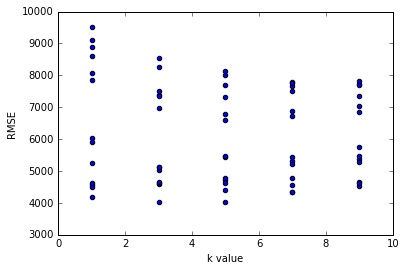

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [26]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

# Multivariate Model for single hyperparameter value 

- Instead of using just a single column for train and test, use all of the columns passed in.
- Use a the default k value from scikit-learn for now (we'll tune the k value in the next step).
- Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
- Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
- Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
- Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
- Display all of the RMSE values.

In [32]:
def knn_train_test(feature_cols, target_col, df):
    
    np.random.seed(1)
    
# randomize order of rows in dataframe df
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
# Divide number of rows in half and round.
    divider = int(len(random_df)/2)
    
# Select the first half and set as training set.
# Select the second half and set as test set.
    train_df = random_df.iloc[0:divider]
    test_df = random_df.iloc[divider:]
    
    k_values = [5]
    k_rmse ={}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors= k)
# Fit the model on the training set
        knn.fit(train_df[feature_cols], train_df[target_col])
    
# Make predictions on the test set
        prediction = knn.predict(test_df[feature_cols])
    
# Calculate MSE and return RMSE
        mse = mean_squared_error(test_df[target_col], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse


In [33]:
k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price',numeric_cars)
k_rmse_results["two best features"] = rmse_val

#--------------------

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

#--------------------

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

#--------------------

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

#--------------------

k_rmse_results

{'five best features': {5: 3341.6024539726504},
 'four best features': {5: 3280.3807311630976},
 'three best features': {5: 3305.9401397969677},
 'two best features': {5: 3589.3132622073304}}

# Multivariate Model for hyperparameter value from 1 to 25


In [35]:
def knn_train_test(feature_cols, target_col, df):
    
    np.random.seed(1)
    
# randomize order of rows in dataframe df
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
# Divide number of rows in half and round.
    divider = int(len(random_df)/2)
    
# Select the first half and set as training set.
# Select the second half and set as test set.
    train_df = random_df.iloc[0:divider]
    test_df = random_df.iloc[divider:]
    
    k_values = [i for i in range(1,25)]
    k_rmse ={}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors= k)
# Fit the model on the training set
        knn.fit(train_df[feature_cols], train_df[target_col])
    
# Make predictions on the test set
        prediction = knn.predict(test_df[feature_cols])
    
# Calculate MSE and return RMSE
        mse = mean_squared_error(test_df[target_col], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse


In [55]:
k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price',numeric_cars)
k_rmse_results["two best features"] = rmse_val

#--------------------

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

#--------------------

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

#--------------------

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

#--------------------

k_rmse_results

{'five best features': {1: 2530.0554077602005,
  2: 2897.1757974767684,
  3: 3183.4597426217424,
  4: 3168.0230415758415,
  5: 3341.6024539726504,
  6: 3537.520542998191,
  7: 3817.290452118825,
  8: 4004.414529685573,
  9: 3992.3186041830318,
  10: 4138.728787853335,
  11: 4342.052852829098,
  12: 4416.145381031136,
  13: 4493.8798141857205,
  14: 4463.501601554571,
  15: 4474.480783207805,
  16: 4553.5595362768345,
  17: 4597.001081375769,
  18: 4655.283442648355,
  19: 4687.900893982822,
  20: 4712.022985543165,
  21: 4755.856625823773,
  22: 4788.162720030673,
  23: 4806.923381965054,
  24: 4879.983352195467},
 'four best features': {1: 2516.589279950226,
  2: 2811.1727257604443,
  3: 3013.3615157930335,
  4: 3126.269482641261,
  5: 3280.3807311630976,
  6: 3479.5099401018138,
  7: 3781.5612742414464,
  8: 3988.8669577450623,
  9: 4024.998621362245,
  10: 4042.247226187899,
  11: 4230.335248684068,
  12: 4354.008675154061,
  13: 4461.626664877788,
  14: 4468.029845088927,
  15: 444

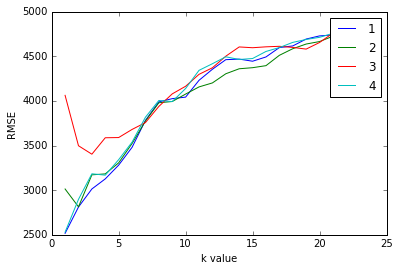

In [56]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(v)


# Conclusion

The optimal k value for the top three models are as follows:

Model with two features : k = 3
Model with three features : k = 2
Model with four features : k = 1
Model with five features : k = 1